<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/Une_d%C3%A9mo_de_clustering_hi%C3%A9rarchique_Ward_structur%C3%A9_sur_une_image_de_pi%C3%A8ces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Une démo de clustering hiérarchique Ward structuré sur une image de pièces 
Calculez la segmentation d'une image 2D avec le clustering hiérarchique Ward. Le regroupement est spatialement contraint afin que chaque région segmentée soit en un seul morceau.


Générer des données 

In [1]:
from skimage.data import coins

orig_coins = coins()

Redimensionnez-le à 20 % de la taille d'origine pour accélérer le traitement. L'application d'un filtre gaussien pour le lissage avant la réduction d'échelle réduit les artefacts de crénelage.

In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale

smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(
    smoothened_coins,
    0.2,
    mode="reflect",
    anti_aliasing=False,
)

X = np.reshape(rescaled_coins, (-1, 1))

Définir la structure des données 
Les pixels sont connectés à leurs voisins.

In [3]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

# Clustering de calcul 

In [4]:
import time as time

from sklearn.cluster import AgglomerativeClustering

print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity
)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)
print(f"Elapsed time: {time.time() - st:.3f}s")
print(f"Number of pixels: {label.size}")
print(f"Number of clusters: {np.unique(label).size}")

Compute structured hierarchical clustering...
Elapsed time: 0.236s
Number of pixels: 4697
Number of clusters: 27


# Tracer les résultats sur une image 
Le clustering agglomératif est capable de segmenter chaque pièce, cependant, nous avons dû utiliser un n_clusterplus grand que le nombre de pièces car la segmentation trouve un grand en arrière-plan.

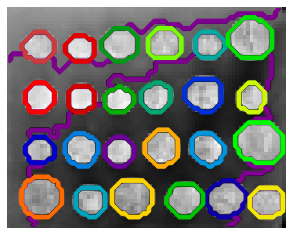

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.axis("off")
plt.show()
